In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

import os
import sys
module_path = os.path.abspath(os.path.join('../'))
if module_path not in sys.path:
    sys.path.append(module_path)
credentials_path = '/Users/valeria/gcp_credentials/loans-experiment-200203204835.json'
if credentials_path not in sys.path:
    sys.path.append(credentials_path)

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [3]:
from src.config.data_constants import COLUMNS
from src.config.paths_constants import RAW_DATA_PATH
from src.data.load_bigquery import load_ee_data_from_db
from src.features.pre_processing import pre_process
from src.features.feature_engineering import apply_feature_engineering

In [4]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/Users/valeria/gcp_credentials/loans-experiment-200203204835.json"

In [5]:
raw_df = load_ee_data_from_db()

In [6]:
df = pre_process(raw_df)
df = apply_feature_engineering(df)

In [7]:
df.head()

,LoanNumber,NewCreditCustomer,LoanApplicationStartedDate,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,LanguageCode,Age,DateOfBirth,Gender,...,NaNLevelInd,PercentageIncomeFromPrincipalEmployer,PercentageIncomeFromPension,PercentageIncomeFromSocialWelfare,PercentageIncomeFromLeavePay,PercentageIncomeFromChildSupport,PercentageIncomeOther,PercentageIncomeFromFamilyAllowance,YearOfBirth,MonthOfBirth
0,864,True,2009-07-28 13:14:56+00:00,14,3,Cross-Ref by Phone,Estonian,31.0,1978-05-21,Woman,...,Low/Med,0.976562,0.0,0.0,0.0,0.0,0.023438,0.0,1978,5
1,1029,True,2009-08-27 12:23:13+00:00,12,5,Cross-Ref by Phone,Estonian,23.0,1986-07-22,Male,...,Low,0.993018,0.0,0.0,0.0,0.0,0.006982,0.0,1986,7
2,1185,True,2009-09-28 12:03:43+00:00,12,2,Cross-Ref by Phone,Estonian,26.0,1983-03-11,Male,...,Low/Med,0.897436,0.0,0.0,0.0,0.0,0.102564,0.0,1983,3
3,962,True,2009-08-17 11:02:31+00:00,11,2,Cross-Ref by Phone,Estonian,38.0,1971-03-14,Male,...,Low,0.909091,0.0,0.0,0.0,0.0,0.090909,0.0,1971,3
4,356,True,2009-04-07 21:22:23+00:00,21,3,Cross-Ref by Phone,Estonian,31.0,1977-06-05,Woman,...,Low,0.473684,0.0,0.0,0.0,0.0,0.526316,0.0,1977,6


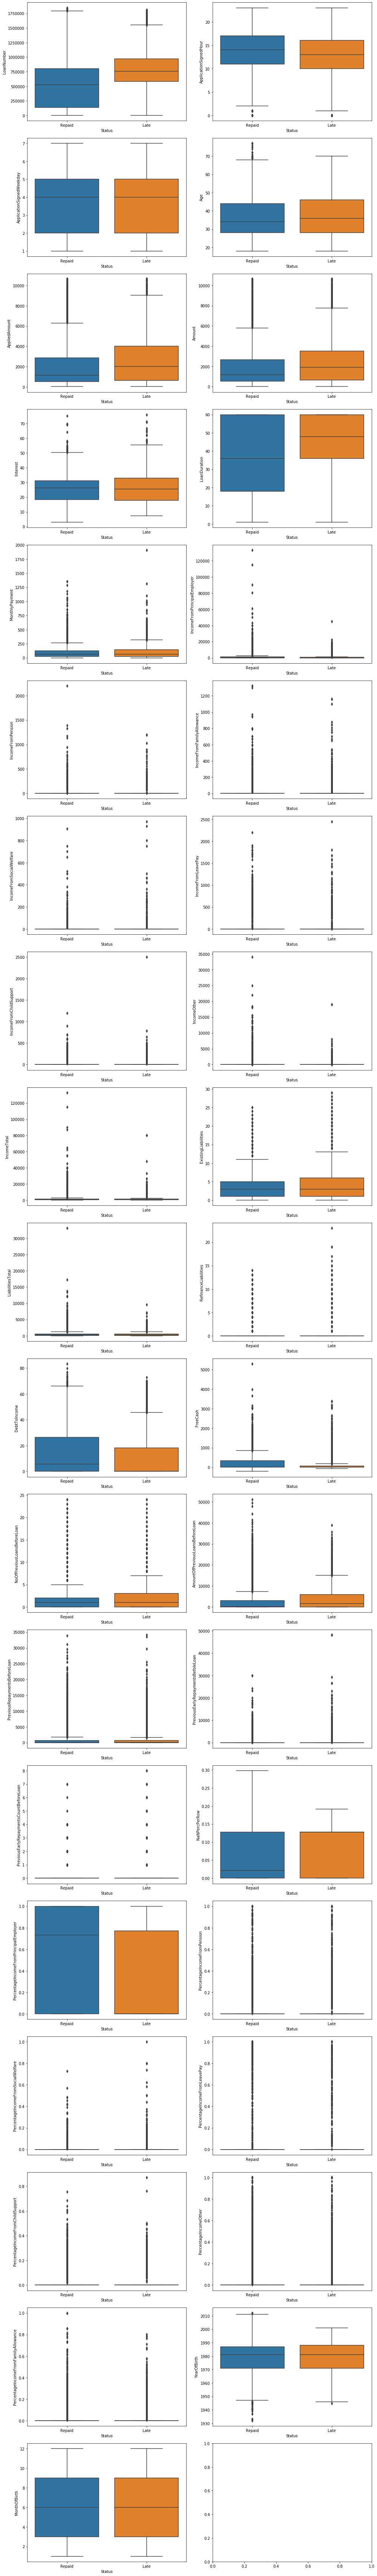

In [9]:
numerical_columns = df.select_dtypes(np.number).columns
nrows = math.ceil(len(numerical_columns)/2)

fig, ax = plt.subplots(nrows, 2, figsize=(14, nrows*5))
row_pos=0
col_pos=0
for col in numerical_columns:
    sns.boxplot(x=df['Status'] ,y=df[col], ax=ax[row_pos][col_pos])
    row_pos = row_pos+1 if col_pos ==1 else row_pos
    col_pos = col_pos+1 if col_pos!=1 else 0
plt.tight_layout()
plt.show() 

In [10]:
print("Missing data".upper())
df = df.replace('', np.nan)
df = df.replace([None], np.nan)
for col in df.columns:
    perc_missing=round(df[col].isnull().sum()/len(df)*100, 10)
    print('{}: {}%'.format(col, perc_missing))

MISSING DATA
LoanNumber: 0.0%
NewCreditCustomer: 0.0%
LoanApplicationStartedDate: 0.0%
ApplicationSignedHour: 0.0%
ApplicationSignedWeekday: 0.0%
VerificationType: 0.0%
LanguageCode: 0.0%
Age: 0.1327023711%
DateOfBirth: 0.0%
Gender: 0.0%
AppliedAmount: 0.0%
Amount: 0.0%
Interest: 0.0%
LoanDuration: 0.0%
MonthlyPayment: 14.8050777436%
County: 3.8734069456%
City: 1.4371917174%
UseOfLoan: 0.0%
Education: 0.0%
MaritalStatus: 0.0%
NrOfDependants: 52.2471769448%
EmploymentStatus: 0.0%
EmploymentDurationCurrentEmployer: 0.0%
WorkExperience: 0.0%
OccupationArea: 0.0%
HomeOwnershipType: 0.0%
IncomeFromPrincipalEmployer: 0.0%
IncomeFromPension: 0.0%
IncomeFromFamilyAllowance: 0.0%
IncomeFromSocialWelfare: 0.0%
IncomeFromLeavePay: 0.0%
IncomeFromChildSupport: 0.0%
IncomeOther: 0.0%
IncomeTotal: 0.0%
ExistingLiabilities: 0.0%
LiabilitiesTotal: 0.0%
RefinanceLiabilities: 0.0%
DebtToIncome: 0.1126718245%
FreeCash: 0.1126718245%
Status: 0.0%
CreditScoreEsMicroL: 0.0%
CreditScoreEeMini: 0.0%
NoOfPrevi

In [ ]:
# Investigate OUTLIER:
COLUMNS.INCOME_FROM_PRINCIPAL_EMPLOYER, COLUMNS.INCOME_FROM_CHILD_SUPPORT, COLUMNS.INCOME_OTHER #FOR REPAID
COLUMNS.LIABILITIES_TOTAL
\COLUMNS.FREE_CASH
COLUMNS.CREDIT_SCORE_EE_MINI #THERE S ONE THAT 0 AND MOST ARE 1000 (WHY?)
# NEED TO TRANSFORM % FROM INCOME - CHECK THAT INCOME TOTAL == SUM OF OTHER INCOME

In [ ]:
# Look at null values and category count

In [ ]:
df[COLUMNS.DATE_OF_BIRTH] = pd.to_datetime(df[COLUMNS.DATE_OF_BIRTH])
for col in ['NewCreditCustomer', 'VerificationType', 'LanguageCode', 'Gender',
       'UseOfLoan', 'Education', 'MaritalStatus',
       'NrOfDependants', 'EmploymentStatus',
       'EmploymentDurationCurrentEmployer', 'WorkExperience', 'OccupationArea',
       'HomeOwnershipType', 'Status', 'CreditScoreEsMicroL']:
    # Calculates the histogram for feature1
    counts = df[col].value_counts(dropna=False)

    counts.plot.bar(title=col)
    plt.show()

- **Verification type**: drop nan (they're so few)
- **Language**: Make stonian, russian and other
- **Gender**: drop nan gender
- view tables for **UseOfLoan** and **Occupatiioin area** (drop?)
- **edu**: drop nan
- **Marital_status**: convert 'nan' to str
- **NrDep**: make it 0, 1, 2+ and nan as stra
- **EmploymentStatus** make it fully emp, nan as str, entr and other
check which have 70% nulls based on columns types and create low, med, high to analyse fairnessa
- **EmployDuratCurrEmp**" Bin Retiree and '' into other (keep the rest)
- **workexp** convert into str
- **HomeOwnership**: bin council house, homeless into other and 'owner with' with owner
- **CREDITSCOREESMICROL** make it binary (is M)

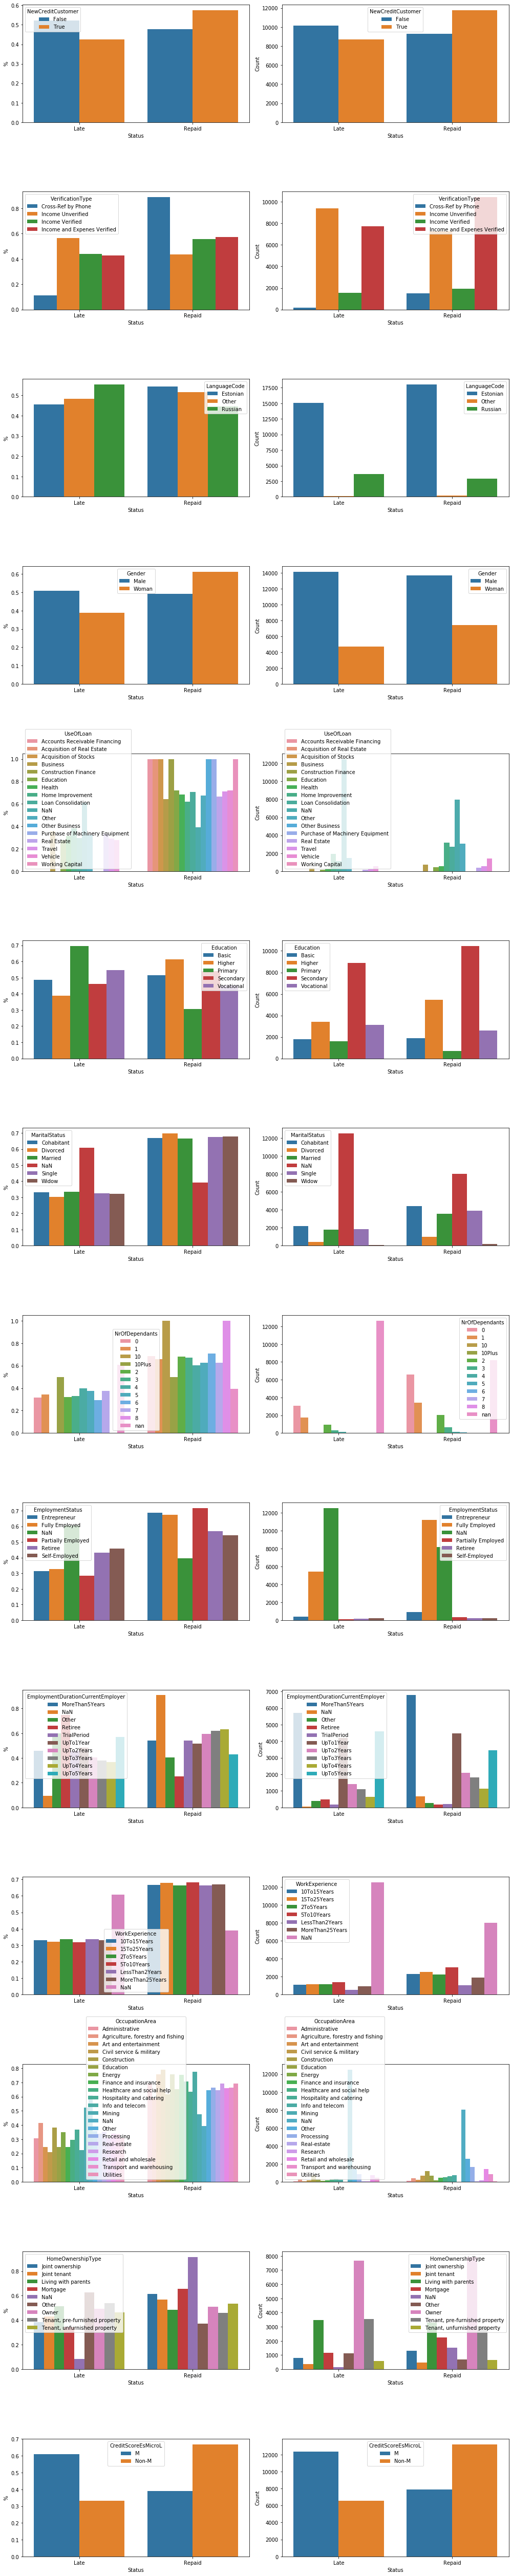

In [11]:
obj_cols = ['NewCreditCustomer', 'VerificationType', 'LanguageCode', 'Gender',
       'UseOfLoan', 'Education', 'MaritalStatus',
       'NrOfDependants', 'EmploymentStatus',
       'EmploymentDurationCurrentEmployer', 'WorkExperience', 'OccupationArea',
       'HomeOwnershipType', 'CreditScoreEsMicroL']
fig, ax = plt.subplots(len(obj_cols), 2, figsize=(14, len(obj_cols)*5))
row_pos=0
for col in obj_cols:
    abs_df = pd.crosstab(index=df[COLUMNS.STATUS], columns=df[col].fillna('nan'), normalize='columns').unstack().reset_index().rename(columns={0:'%'})
    perc_df= pd.crosstab(index=df[COLUMNS.STATUS], columns=df[col].fillna('nan')).unstack().reset_index().rename(columns={0:'Count'})
    sns.barplot(data=abs_df, x=COLUMNS.STATUS, y='%', ax=ax[row_pos][0], hue=col)
    sns.barplot(data=perc_df, x=COLUMNS.STATUS, y='Count', ax=ax[row_pos][1], hue=col)
    row_pos = row_pos+1
plt.tight_layout()
plt.show() 


In [ ]:
abs_df = pd.crosstab(index=df[COLUMNS.STATUS], columns=df[COLUMNS.USE_OF_LOAN].fillna('nan'), normalize='columns')
abs_df

In [ ]:
abs_df.loc['Repaid'].mean()

In [ ]:
perc_df= pd.crosstab(index=df[COLUMNS.STATUS], columns=df[COLUMNS.USE_OF_LOAN].fillna('nan'))
perc_df

In [ ]:
#too many counties and too many cities ... check which are more distinctive
# too many missng values n use of loan - check if any is relevant, same for marital_status, employment_status, 
#WORK EXPERENCE, OCCUPATON AREA